<Figure size 1600x800 with 8 Axes>

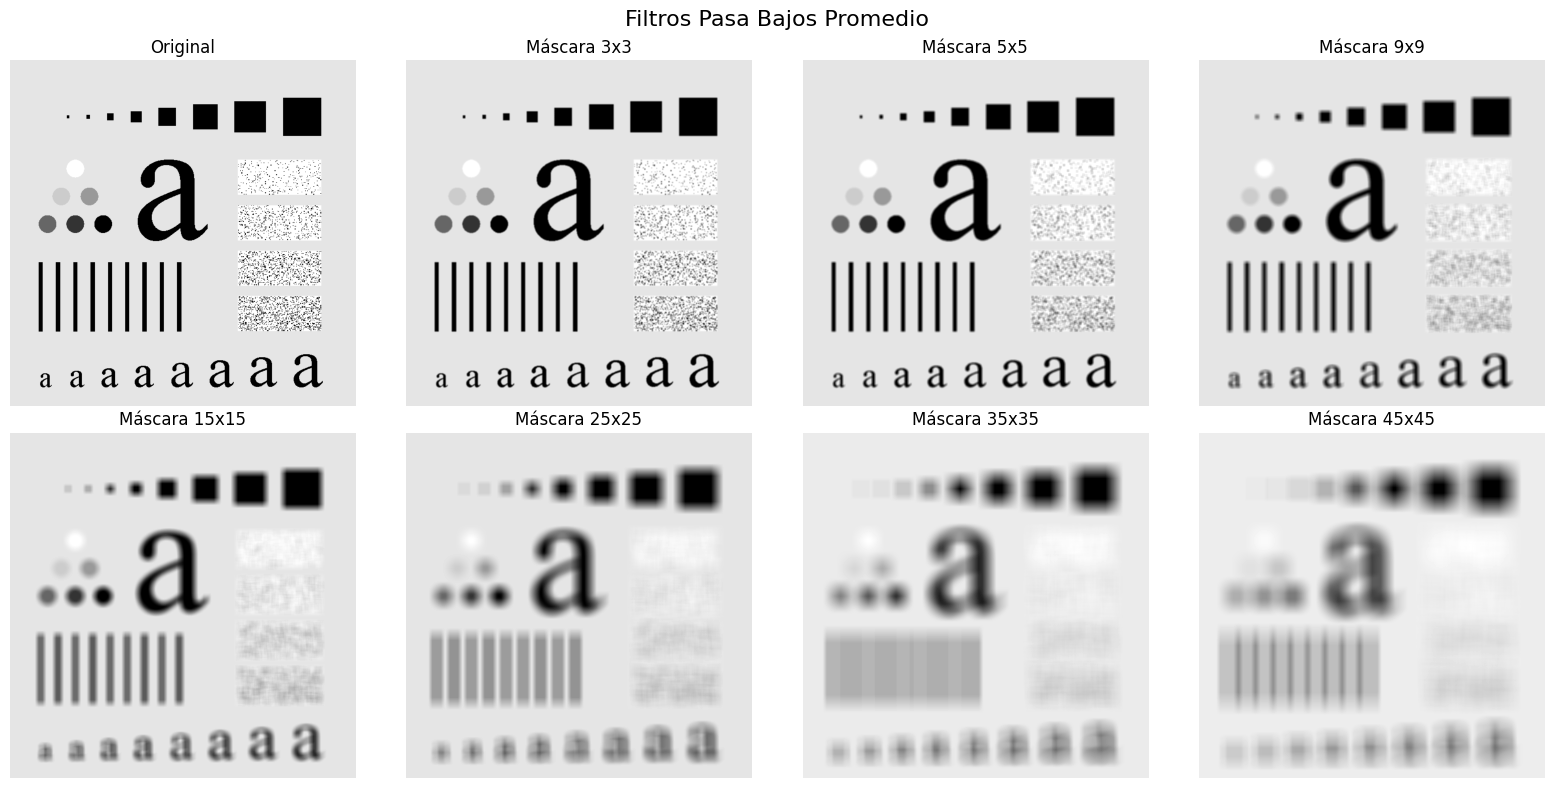

In [1]:
# --- Filtros Pasa Bajos Promedio en JupyterLite ---
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.signal import convolve2d

# Cargar la imagen original
I = Image.open("Fig0448(a)(characters_test_pattern).tif").convert("L")
I = np.array(I, dtype=float) / 255.0  # Normalizar

# Definir los tamaños de máscara
mask_sizes = [3, 5, 9, 15, 25, 35, 45, 55]

# Crear función de filtro promedio
def filtro_promedio(img, n):
    kernel = np.ones((n, n)) / (n * n)
    return convolve2d(img, kernel, mode='same', boundary='symm')

# Mostrar resultados
plt.figure(figsize=(16, 8))
plt.suptitle("Filtros Pasa Bajos Promedio", fontsize=16)

# Imagen original
plt.subplot(2, 4, 1)
plt.imshow(I, cmap='gray')
plt.title("Original")
plt.axis('off')

# Aplicar los filtros y mostrar
for i, n in enumerate(mask_sizes[:7], start=2):
    filtrada = filtro_promedio(I, n)
    plt.subplot(2, 4, i)
    plt.imshow(filtrada, cmap='gray')
    plt.title(f"Máscara {n}x{n}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
"""
El código aplica filtros pasa bajos promedio de distintos tamaños a una imagen.
Primero carga la imagen y la convierte en una matriz numérica. Luego, crea un kernel cuadrado 
de tamaño n×n donde todos los valores son iguales y suman 1. Al aplicar este filtro mediante 
convolución, cada píxel se reemplaza por el promedio de sus vecinos, lo que suaviza la imagen.

A medida que el tamaño del filtro aumenta (3×3, 5×5, 9×9, etc.), el resultado se vuelve más 
borroso: se reducen los detalles y bordes finos porque el filtro elimina las frecuencias 
altas (cambios bruscos de intensidad) y conserva solo las frecuencias bajas (zonas suaves).

En resumen, el filtro promedio actúa como un suavizador o desenfocador, útil para reducir 
ruido o preparar imágenes para otros procesamientos.

"""